In [362]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
import nbformat
from sklearn import datasets, svm, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import warnings
import imblearn
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline

In [363]:
# reading the .csv file
df = pd.read_csv('/home/nicholas/repos/ifood_da_challenge/ml_project1_data.csv')

# checking for data types
print(df.dtypes, "\n")

# cheking number o rows and columns
print(df.shape, "(rows, columns)\n")

# cheking the percentege of null values
for column in df.columns:
    percentage = df[column].isnull().mean()
    print(f'{column}: {round(percentage*100, 2)}%')


ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object 

(2240, 29) (rows, columns)

ID: 0.0%
Year_Birth: 0.0%
Education: 0.0%
Marital_Status:

In [364]:
# replacing missing values by the mean
df['Income'].fillna(df['Income'].mean(), inplace=True)

In [365]:
# Looking for outliers

print('Income:')
fig = go.Figure()
fig.add_box(x=df['Income'], text=df['Income'])
iplot(fig)

print('MntWines:')
fig = go.Figure()
fig.add_box(x=df['MntWines'], text=df['MntWines'])
iplot(fig)

print('MntFruits:')
fig = go.Figure()
fig.add_box(x=df['MntFruits'], text=df['MntFruits'])
iplot(fig)

print('MntMeatProducts:')
fig = go.Figure()
fig.add_box(x=df['MntMeatProducts'], text=df['MntMeatProducts'])
iplot(fig)

print('MntFishProducts:')
fig = go.Figure()
fig.add_box(x=df['MntFishProducts'], text=df['MntFishProducts'])
iplot(fig)

print('MntSweetProducts:')
fig = go.Figure()
fig.add_box(x=df['MntSweetProducts'], text=df['MntSweetProducts'])
iplot(fig)

print('MntGoldProds:')
fig = go.Figure()
fig.add_box(x=df['MntGoldProds'], text=df['MntGoldProds'])
iplot(fig)

print('NumDealsPurchases:')
fig = go.Figure()
fig.add_box(x=df['NumDealsPurchases'], text=df['NumDealsPurchases'])
iplot(fig)

print('NumWebPurchases:')
fig = go.Figure()
fig.add_box(x=df['NumWebPurchases'], text=df['NumWebPurchases'])
iplot(fig)

print('NumCatalogPurchases:')
fig = go.Figure()
fig.add_box(x=df['NumCatalogPurchases'], text=df['NumCatalogPurchases'])
iplot(fig)

print('NumStorePurchases:')
fig = go.Figure()
fig.add_box(x=df['NumStorePurchases'], text=df['NumStorePurchases'])
iplot(fig)

print('NumWebVisitsMonth:')
fig = go.Figure()
fig.add_box(x=df['NumWebVisitsMonth'], text=df['NumWebVisitsMonth'])
iplot(fig)

Income:


MntWines:


MntFruits:


MntMeatProducts:


MntFishProducts:


MntSweetProducts:


MntGoldProds:


NumDealsPurchases:


NumWebPurchases:


NumCatalogPurchases:


NumStorePurchases:


NumWebVisitsMonth:


In [366]:
print("Upper outer fence value for income:", int(df['Income'].mean() + 3*df['Income'].std()))

print("Upper outer fence value for MntWines:", int(df['MntWines'].mean() + 3*df['MntWines'].std()))

print("Upper outer fence value for MntFruits:", int(df['MntFruits'].mean() + 3*df['MntFruits'].std()))

print("Upper outer fence value for MntMeatProducts:", int(df['MntMeatProducts'].mean() + 3*df['MntMeatProducts'].std()))

print("Upper outer fence value for MntFishProducts:", int(df['MntFishProducts'].mean() + 3*df['MntFishProducts'].std()))

print("Upper outer fence value for MntSweetProducts:", int(df['MntSweetProducts'].mean() + 3*df['MntSweetProducts'].std()))

print("Upper outer fence value for MntGoldProds:", int(df['MntGoldProds'].mean() + 3*df['MntGoldProds'].std()))

print("Upper outer fence value for NumDealsPurchases:", int(df['NumDealsPurchases'].mean() + 3*df['NumDealsPurchases'].std()))

print("Upper outer fence value for NumWebPurchases:", int(df['NumWebPurchases'].mean() + 3*df['NumWebPurchases'].std()))

print("Upper outer fence value for NumCatalogPurchases:", int(df['NumCatalogPurchases'].mean() + 3*df['NumCatalogPurchases'].std()))

print("Upper outer fence value for NumStorePurchases:", int(df['NumStorePurchases'].mean() + 3*df['NumStorePurchases'].std()))

print("Upper outer fence value for NumWebVisitsMonth:", int(df['NumWebVisitsMonth'].mean() + 3*df['NumWebVisitsMonth'].std()))

Upper outer fence value for income: 127360
Upper outer fence value for MntWines: 1313
Upper outer fence value for MntFruits: 145
Upper outer fence value for MntMeatProducts: 844
Upper outer fence value for MntFishProducts: 201
Upper outer fence value for MntSweetProducts: 150
Upper outer fence value for MntGoldProds: 200
Upper outer fence value for NumDealsPurchases: 8
Upper outer fence value for NumWebPurchases: 12
Upper outer fence value for NumCatalogPurchases: 11
Upper outer fence value for NumStorePurchases: 15
Upper outer fence value for NumWebVisitsMonth: 12


In [367]:
# removing strong outliers

df.drop(df[df.Income>127360].index, inplace=True)

df.drop(df[df.MntWines>1313].index, inplace=True)

df.drop(df[df.MntFruits>145].index, inplace=True)

df.drop(df[df.MntMeatProducts>844].index, inplace=True)

df.drop(df[df.MntFishProducts>201].index, inplace=True)

df.drop(df[df.MntSweetProducts>150].index, inplace=True)

df.drop(df[df.MntGoldProds>200].index, inplace=True)

df.drop(df[df.NumDealsPurchases>8].index, inplace=True)

df.drop(df[df.NumWebPurchases>12].index, inplace=True)

df.drop(df[df.NumCatalogPurchases>11].index, inplace=True)

df.drop(df[df.NumStorePurchases>15].index, inplace=True)

df.drop(df[df.NumWebVisitsMonth>12].index, inplace=True)

In [368]:
# Text Normalization

df_str = list(df.select_dtypes(include = 'object').columns.values)
df_numeric = list(df.select_dtypes(include = ['int64', 'float64']).columns.values)
df_columns = list(df.columns.values)

for i in df_str:
    df[i].str.lower()
    df[i].str.strip()
    df[i].replace('[^\w\s]', '', regex=True, inplace=True)

In [369]:
# looking for weird objects

print(df['Education'].unique())

print(df['Marital_Status'].unique())

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [370]:
# Removing weird objects

df.drop(df[df.Marital_Status == 'YOLO'].index, inplace=True)
df.drop(df[df.Marital_Status == 'Alone'].index, inplace=True)
df.drop(df[df.Marital_Status == 'Absurd'].index, inplace=True)

In [371]:
# Verifing if the data is inbalanced

# class count
class_count_0, class_count_1 = df['Response'].value_counts()

# Separate class
class_0 = df[df['Response'] == 0]
class_1 = df[df['Response'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (1713, 29)
class 1: (261, 29)


In [372]:
#class_1_over = class_1.sample(class_count_0, replace=True)

#test_over = pd.concat([class_1_over, class_0], axis=0)

#print("total class of 1 and 0:\n",test_over['Response'].value_counts()) # plot the count after under-sampeling
#test_over['Response'].value_counts().plot(kind='bar', title='count (target)')

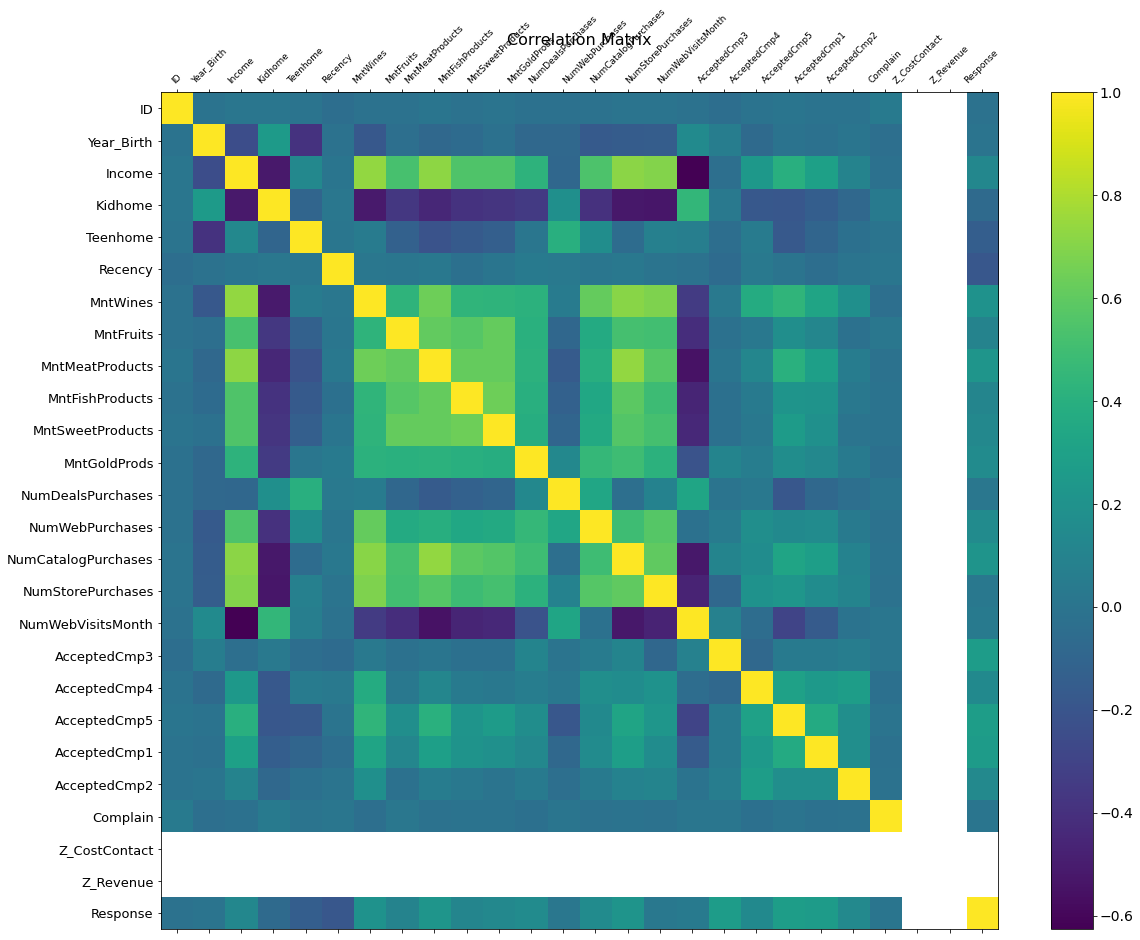

In [373]:
#correlation graph

f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=9, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=13)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [374]:
# removing Z columns

df.drop('Z_CostContact', axis = 1, inplace=True)
df.drop('Z_Revenue', axis = 1, inplace=True)

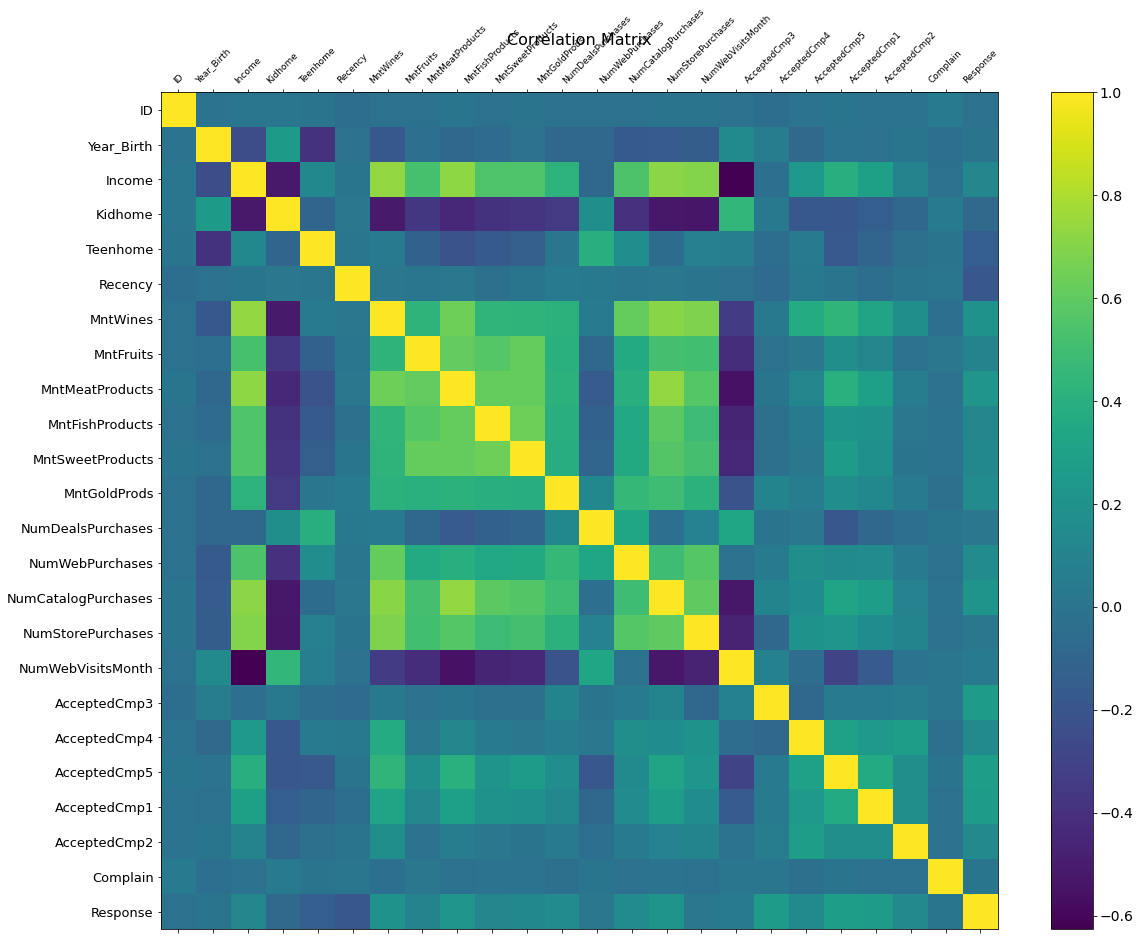

In [375]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=9, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=13)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [376]:
# spliting data

Y = df['Response'].values

features = ['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Response']

df = pd.get_dummies(df[features])

X_train, X_test, Y_train, Y_test = train_test_split(df, Y, test_size=0.25, shuffle=True)

In [377]:
# defining a function to print the results

def print_model_results(results):
  media = results['test_score'].mean()
  desvio_padrao = results['test_score'].std()
  print("Accuracy médio: %.2f" % (media * 100))
  print("Accuracy intervalo: [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

In [382]:
# training ML model

from sklearn.model_selection import KFold

scoring = ['precision_macro', 'recall_macro']

cv = KFold(n_splits = 10, shuffle=True)

model = DecisionTreeClassifier(max_depth=2)

pipeline = Pipeline([('estimator', model)])

predictian = cross_validate(pipeline, df, Y, cv = cv, scoring=scoring, return_train_score=False)

#print_model_results(predictian)
print('Precision:', predictian['test_precision_macro'].mean())

Precision: 1.0
